In [71]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json
from pathlib import Path

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../src')
from settings import REPLAY_DIR, YOUTUBE_DIR, TIMESTAMPS_DIR
from youtube import convert_to_timestamp
from dota import Match
from highlights import SignalHP

pd.options.display.max_columns = 60

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
match = Match(6676393091, Path(REPLAY_DIR) / '6676393091.jsonlines')
match._parse_events()
match

Match: 6676393091, parsed: True

In [55]:
player = match.players[1]
player

MatchPlayer at match: 6676393091, slot: 1, hero_name: npc_dota_hero_pangolier, steam_id: 76561198134243802

In [56]:
player.hp.t(15 * 60, 16 * 60)

900    1250
901    1250
902    1238
903    1239
904    1278
       ... 
956    1290
957    1290
958    1290
959    1258
960    1138
Name: hp, Length: 61, dtype: int64

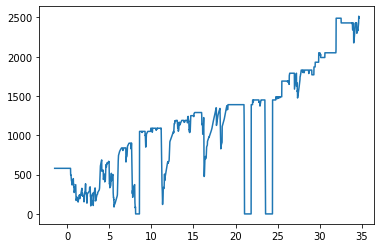

In [57]:
plt.plot(player.hp.index / 60, player.hp)

## Deaths

In [58]:
player.deaths

,time,type,value,attackername,targetname,sourcename,targetsourcename,attackerhero,targethero,attackerillusion,targetillusion,inflictor
0,487,DOTA_COMBATLOG_DEATH,131,npc_dota_hero_ember_spirit,npc_dota_hero_pangolier,npc_dota_hero_ember_spirit,npc_dota_hero_pangolier,True,True,False,False,dota_unknown
1,1263,DOTA_COMBATLOG_DEATH,22,npc_dota_hero_skywrath_mage,npc_dota_hero_pangolier,npc_dota_hero_skywrath_mage,npc_dota_hero_pangolier,True,True,False,False,skywrath_mage_mystic_flare
2,1412,DOTA_COMBATLOG_DEATH,237,npc_dota_hero_luna,npc_dota_hero_pangolier,npc_dota_hero_luna,npc_dota_hero_pangolier,True,True,False,False,luna_lucent_beam


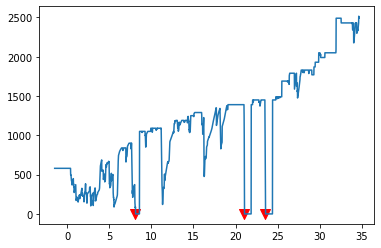

In [59]:
fig, ax = plt.subplots()
ax.plot(player.hp.index / 60, player.hp)
ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], 0), color='r', marker='v', s=100)
plt.show()

## YouTube

In [60]:
df_youtube = pd.read_csv(YOUTUBE_DIR / 'XTngObUROMo.csv')
df_youtube

,video_id,cluster,start,end,start_time,end_time
0,XTngObUROMo,0,00:19,00:02,19,2
1,XTngObUROMo,1,01:00,01:19,60,79
2,XTngObUROMo,2,02:38,03:14,158,194
3,XTngObUROMo,3,04:30,05:35,270,335
4,XTngObUROMo,4,14:19,14:56,859,896
5,XTngObUROMo,5,15:53,16:13,953,973
6,XTngObUROMo,6,18:06,18:13,1086,1093
7,XTngObUROMo,7,18:47,18:56,1127,1136
8,XTngObUROMo,8,21:11,21:47,1271,1307
9,XTngObUROMo,9,22:34,24:25,1354,1465


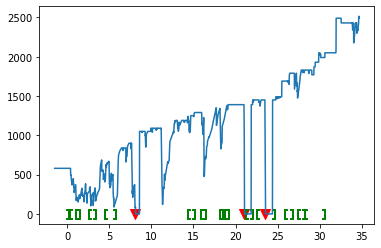

In [61]:
fig, ax = plt.subplots()
ax.plot(player.hp.index / 60, player.hp)
ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], 0), color='r', marker='v', s=100)
ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], 0), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], 0), color='g', marker='$]$', s=100)
plt.show()

## Remove trend

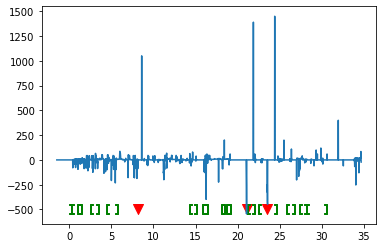

In [62]:
fig, ax = plt.subplots()
ax.plot(player.dhp.index / 60, player.dhp)
ax.scatter(x=player.deaths['time'] / 60, y=np.full(player.deaths.shape[0], -500), color='r', marker='v', s=100)
ax.scatter(x=df_youtube['start_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube['end_time'] / 60, y=np.full(df_youtube.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

## Zoom

In [67]:
zoom_start = 15 * 60
zoom_end = 16.5 * 60
df_youtube_slice = df_youtube[(df_youtube['start_time'] >= zoom_start) & (df_youtube['end_time'] <= zoom_end)]

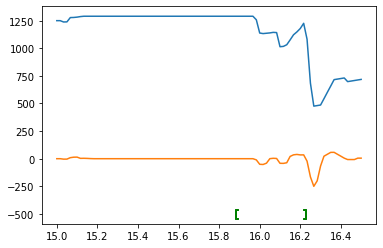

In [69]:
fig, ax = plt.subplots()
ax.plot(player.hp.t(zoom_start, zoom_end).index / 60, player.hp.t(zoom_start, zoom_end))
ax.plot(player.sdhp.t(zoom_start, zoom_end).index / 60, player.sdhp.t(zoom_start, zoom_end))
ax.scatter(
    x=player.deaths.t(zoom_start, zoom_end)['time'] / 60, 
    y=np.full(player.deaths.t(zoom_start, zoom_end).shape[0], -500),
    color='r', marker='v', s=100)
ax.scatter(x=df_youtube_slice['start_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$[$', s=100)
ax.scatter(x=df_youtube_slice['end_time'] / 60, y=np.full(df_youtube_slice.shape[0], -500), color='g', marker='$]$', s=100)
plt.show()

# Detector

## Signal HP

In [77]:
SignalHP(player).detect()

-89      False
-88      False
-87      False
-86      False
-85      False
         ...  
 2076    False
 2077    False
 2078    False
 2079    False
 2080    False
Name: sdhp, Length: 2170, dtype: bool